# An example of using candex with source netCDF files in irregualr shape 
## Remapping of SCDNA to subbasins of South Saskatchewan River at Medicine Hat, Alberta, Canada.

       index   LATITUDE   LONGITUDE                     geometry
0          4  48.939999 -123.739998  POINT (-123.74000 48.94000)
1          6  48.520000 -123.370003  POINT (-123.37000 48.52000)
2          8  48.820000 -124.129997  POINT (-124.13000 48.82000)
3          9  48.830002 -124.050003  POINT (-124.05000 48.83000)
4         10  48.770000 -123.680000  POINT (-123.68000 48.77000)
...      ...        ...         ...                          ...
19599  27271  59.049999 -158.516693  POINT (-158.51669 59.05000)
19600  27272  56.247200 -134.644699  POINT (-134.64470 56.24720)
19601  27273  20.962500 -156.675293  POINT (-156.67529 20.96250)
19602  27274  47.508301 -115.946098  POINT (-115.94610 47.50830)
19603  27275  21.316700 -158.066696  POINT (-158.06670 21.31670)

[19604 rows x 4 columns]


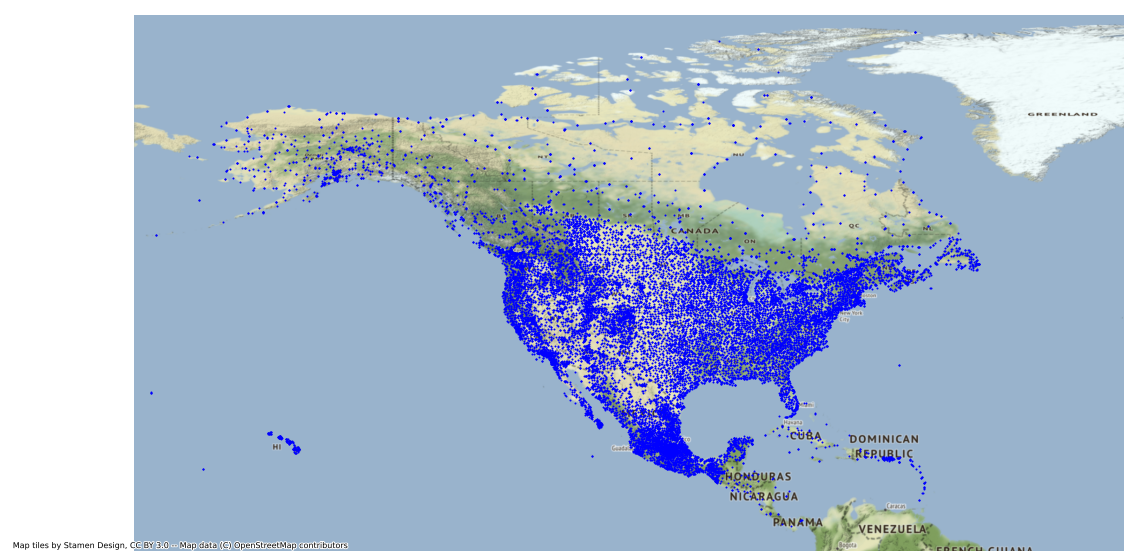

In [10]:
import pandas as pd
import numpy as np
import xarray as xr
from   shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import shapefile
import geovoronoi
import requests

ds = xr.open_dataset('/Users/shg096/Desktop/SCDNA_v1.1.nc')
name_of_varibale = 'tmin'

df = pd.DataFrame()
df['values'] = np.array (ds[name_of_varibale][:,1400])
df['LATITUDE'] = np.array(ds.LLE[0,:])
df['LONGITUDE'] = np.array(ds.LLE[1,:])
df = df.dropna() # remove the nan values from the data frame
df = df.reset_index()

#
points = df
points = points.drop(columns = ['values'])


# the columns of the DataFrame
points['geometry'] = points.apply(lambda row: Point(row.LONGITUDE, row.LATITUDE ), axis=1) # set the geometry
points  = gpd.GeoDataFrame(points) # pass this to a geopandas dataframe
print(points)
points.to_file('point.shp')


# boundary = gpd.read_file(“data/uppsala.shp”)
fig, ax = plt.subplots(figsize=(20, 10))
points.plot(ax=ax, color='blue', markersize = 1)
ax.axis('off')
plt.axis('equal')
ctx.add_basemap(ax, zoom=4, crs='EPSG:4326')
plt.show()



In [11]:

parts = []
with shapefile.Writer('test.shp') as w:
    w.autoBalance = 1 # turn on function that keeps file stable if number of shapes and records don't line up
    w.field("ID_s",'N') # create (N)umerical attribute fields, integer
    w.field("lat_s",'F',decimal=4) # float with 4 decimals
    w.field("lon_s",'F',decimal=4) # float with 4 decimals

    # creating the polygon given the lat and lon
    parts.append([ (-180,  0),\
                   (-180, 90), \
                   (0   , 90), \
                   (0   ,  0), \
                   (-180,  0)])

    # store polygon
    w.poly(parts)

    # update records/fields for the polygon
    w.record(1, 1, 1)

shp_source = gpd.read_file('test.shp')
shp_source = shp_source.set_crs("EPSG:4326") # set the projection to WGS84


In [12]:
# import numpy as np
# import geopandas as gpd
# import contextily as ctx
# import matplotlib.pyplot as plt
# from shapely.ops import cascaded_union
# from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
# from geovoronoi import voronoi_regions_from_coords, points_to_coords


import geovoronoi


points = gpd.read_file('point.shp')
print(points)

coords = geovoronoi.points_to_coords(points.geometry)
boundary = gpd.read_file('test.shp')

poly_shapes, ID = \
geovoronoi.voronoi_regions_from_coords(coords, boundary.iloc[0].geometry)



       index   LATITUDE   LONGITUDE                     geometry
0          4  48.939999 -123.739998  POINT (-123.74000 48.94000)
1          6  48.520000 -123.370003  POINT (-123.37000 48.52000)
2          8  48.820000 -124.129997  POINT (-124.13000 48.82000)
3          9  48.830002 -124.050003  POINT (-124.05000 48.83000)
4         10  48.770000 -123.680000  POINT (-123.68000 48.77000)
...      ...        ...         ...                          ...
19599  27271  59.049999 -158.516693  POINT (-158.51669 59.05000)
19600  27272  56.247200 -134.644699  POINT (-134.64470 56.24720)
19601  27273  20.962500 -156.675293  POINT (-156.67529 20.96250)
19602  27274  47.508301 -115.946098  POINT (-115.94610 47.50830)
19603  27275  21.316700 -158.066696  POINT (-158.06670 21.31670)

[19604 rows x 4 columns]


In [13]:
print(len(poly_shapes))

19590


In [14]:
newdata = gpd.GeoDataFrame()
newdata['geometry'] = None
newdata['ID'] = None
newdata['LATITUDE'] = None
newdata['LONGITUDE'] = None


for i in np.arange(len(poly_shapes)):
    print(i)
    poly = Polygon(Polygon(poly_shapes[i]))
    newdata.loc[i, 'geometry'] = poly
    newdata.loc[i, 'ID']      = ID[i][0]
    newdata.loc[i, 'LATITUDE'] = points.iloc[pts[i][0]].LATITUDE
    newdata.loc[i, 'LONGITUDE']= points.iloc[pts[i][0]].LONGITUDE

# Let's see what we have now
print(newdata)
newdata = newdata.set_crs("EPSG:4326")

newdata.to_file('Thissen.shp')



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067


3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792


5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458


6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101


8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778


10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
1038

11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
1177

12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13151
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
1316

14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
14472
14473
14474
14475
14476
14477
14478
14479
14480
14481
14482
14483
14484
14485
14486
14487
14488
14489
14490
14491
14492
14493
14494
14495
14496
14497
14498
14499
14500
14501
14502
14503
14504
14505
14506
14507
14508
14509
14510
14511
14512
14513
14514
14515
14516
14517
14518
14519
14520
14521
14522
14523
14524
14525
14526
14527
14528
14529
14530
1453

15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
1591

17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
17160
17161
17162
17163
17164
17165
17166
17167
17168
17169
17170
17171
17172
17173
17174
17175
17176
17177
17178
17179
17180
17181
17182
17183
17184
17185
17186
17187
17188
17189
17190
17191
17192
17193
17194
17195
17196
17197
17198
17199
17200
17201
17202
17203
17204
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
17246
17247
17248
17249
17250
17251
17252
17253
17254
17255
17256
17257
17258
17259
17260
17261
17262
17263
17264
17265
17266
17267
17268
17269
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17295
17296
1729

18528
18529
18530
18531
18532
18533
18534
18535
18536
18537
18538
18539
18540
18541
18542
18543
18544
18545
18546
18547
18548
18549
18550
18551
18552
18553
18554
18555
18556
18557
18558
18559
18560
18561
18562
18563
18564
18565
18566
18567
18568
18569
18570
18571
18572
18573
18574
18575
18576
18577
18578
18579
18580
18581
18582
18583
18584
18585
18586
18587
18588
18589
18590
18591
18592
18593
18594
18595
18596
18597
18598
18599
18600
18601
18602
18603
18604
18605
18606
18607
18608
18609
18610
18611
18612
18613
18614
18615
18616
18617
18618
18619
18620
18621
18622
18623
18624
18625
18626
18627
18628
18629
18630
18631
18632
18633
18634
18635
18636
18637
18638
18639
18640
18641
18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
18654
18655
18656
18657
18658
18659
18660
18661
18662
18663
18664
18665
18666
18667
18668
18669
18670
18671
18672
18673
18674
18675
18676
18677
18678
18679
18680
18681
18682
18683
18684
18685
18686
18687
18688
18689
18690
18691
18692
18693
1869

<xarray.Dataset>
Dimensions:    (lle: 3, nchar: 13, nday: 14610, nsf: 3, nstn: 27276)
Dimensions without coordinates: lle, nchar, nday, nsf, nstn
Data variables:
    ID         (nchar, nstn) |S1 ...
    LLE        (lle, nstn) float32 ...
    date       (nday) int32 ...
    sflag      (nsf, nstn) |S1 ...
    prcp       (nstn, nday) float32 ...
    prcp_flag  (nstn, nday) float64 ...
    prcp_kge   (nstn) float32 ...
    tmin       (nstn, nday) float32 ...
    tmin_flag  (nstn, nday) float64 ...
    tmin_kge   (nstn) float32 ...
    tmax       (nstn, nday) float32 ...
    tmax_flag  (nstn, nday) float64 ...
    tmax_kge   (nstn) float32 ...


(10.0, 80.0)

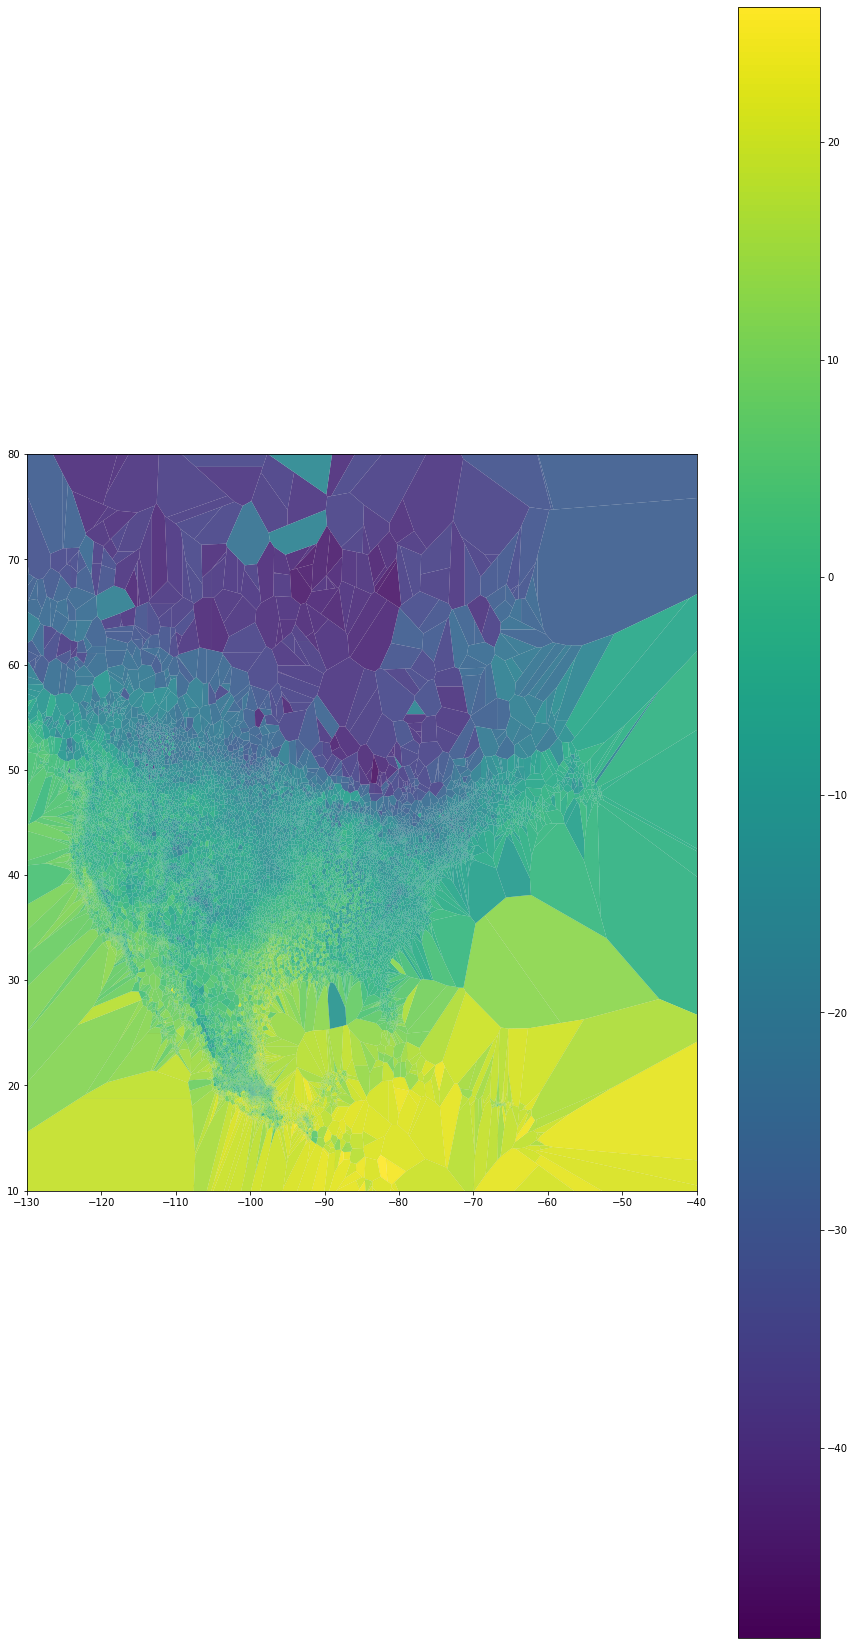

In [16]:



ds = xr.open_dataset('/Users/shg096/Desktop/SCDNA_v1.1.nc')
print(ds)

df = pd.DataFrame()

temp = np.array (ds.tmin [:,1500])
temp = temp[~np.isnan(temp)]

newdata = gpd.read_file('Thissen.shp')

idx = np.array(newdata.ID).astype(int)

newdata['values'] = temp[idx]


newdata['LONGITUDE'] = newdata['LONGITUDE'].astype(float)
newdata['LATITUDE'] = newdata['LATITUDE'].astype(float)

newdata_slice = newdata

# newdata_slice = newdata [newdata['LONGITUDE']>-120]
# newdata_slice = newdata_slice [newdata_slice['LONGITUDE']<-108]
# newdata_slice = newdata_slice [newdata_slice['LATITUDE']>48]
# newdata_slice = newdata_slice [newdata_slice['LATITUDE']<52]

ax  = newdata_slice.plot(column="values", edgecolor='k',linewidth = 0.01 , figsize=(15,30),\
                         legend=True, alpha=0.9)

#ctx.add_basemap(ax, zoom=2, crs='EPSG:4326')
#plt.scatter (points['LONGITUDE'],points['LATITUDE'])

plt.xlim([-130,-40])
plt.ylim([10,80])


# points = gpd.read_file('point.shp')
# print(points)
# ax1 = plt.scatter(newdata.stn_lon, newdata.stn_lat)

# ctx.add_basemap(ax= axes, zoom=12)
# ctx.add_basemap(axes, zoom=3)

#points.plot(ax = axes)

#plt.scatter (points['LONGITUDE'],points['LATITUDE'])

In [ ]:
import requests

print('Beginning file download with requests')

url = 'https://zenodo.org/record/3953310/files/SCDNA_v1.1.nc4?download=1'
r = requests.get(url)

with open('/Users/shg096/Desktop/SCDNA_v1.1_test.nc', 'wb') as f:
    f.write(r.content)

# Retrieve HTTP meta-data
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)


In [1]:
import numpy as np
import xarray as xr

ds = xr.open_dataset('/Users/shg096/Desktop/SCDNA_v1.1.nc')

ds = ds.drop(['tmax','tmax_flag', 'tmax_kge', 'prcp', 'prcp_flag','prcp_kge', 'tmin_flag', 'tmin_kge'])


ds['LATITUDE'] = ds.LLE[0,:]
ds['LONGITUDE'] = ds.LLE[1,:]

import netCDF4      as nc4

with nc4.Dataset('time.nc', "w", format="NETCDF4") as ncid: # creating the NetCDF file
    
    dimid_T = ncid.createDimension('nday', None)   # unlimited dimensiton

    # Variable time
    time_varid = ncid.createVariable('time', 'i4', ('nday', ))
    # Attributes
    time_varid.long_name = 'time'
    time_varid.units = 'days since 1979-01-01'  # e.g. 'days since 2000-01-01 00:00' should change accordingly
    time_varid.calendar = 'standard'
    time_varid.standard_name = 'time'
    time_varid.axis = 'T'
    time_varid[:] = np.arange(14610)


ds_time = xr.open_dataset('time.nc')

# days = pd.date_range(start='1/1/1979', end='31/12/2018')
# attrs = {"units": "days since 1979-01-01"}
# ds_time = xr.Dataset(({"time": ("nday", days)}))
# ds_time.to_netcdf('time.nc'); ds_time = xr.Dataset('time.nc')

ds = xr.merge([ds, ds_time])

print(ds)

ds1 = ds.rename({'nday':'time'})

ds1.to_netcdf('/Users/shg096/Desktop/SCDNA_v1.1_latlon1.nc')

ds2 = xr.open_dataset('/Users/shg096/Desktop/SCDNA_v1.1_latlon1.nc')

print(ds)

ds2 = ds2.set_coords('time')
print(ds1)

ds2.to_netcdf('/Users/shg096/Desktop/SCDNA_v1.1_latlon2.nc')

#ds.tmin[:,1].plot()

# ds.to_netcdf('/Users/shg096/Desktop/SCDNA_v1.1_latlon.nc')




<xarray.Dataset>
Dimensions:    (lle: 3, nchar: 13, nday: 14610, nsf: 3, nstn: 27276)
Dimensions without coordinates: lle, nchar, nday, nsf, nstn
Data variables:
    ID         (nchar, nstn) |S1 ...
    LLE        (lle, nstn) float32 ...
    date       (nday) int32 ...
    sflag      (nsf, nstn) |S1 ...
    tmin       (nstn, nday) float32 ...
    LATITUDE   (nstn) float32 ...
    LONGITUDE  (nstn) float32 ...
    time       (nday) datetime64[ns] ...
<xarray.Dataset>
Dimensions:    (lle: 3, nchar: 13, nday: 14610, nsf: 3, nstn: 27276)
Dimensions without coordinates: lle, nchar, nday, nsf, nstn
Data variables:
    ID         (nchar, nstn) |S1 ...
    LLE        (lle, nstn) float32 ...
    date       (nday) int32 ...
    sflag      (nsf, nstn) |S1 ...
    tmin       (nstn, nday) float32 ...
    LATITUDE   (nstn) float32 ...
    LONGITUDE  (nstn) float32 ...
    time       (nday) datetime64[ns] ...
<xarray.Dataset>
Dimensions:    (lle: 3, nchar: 13, nsf: 3, nstn: 27276, time: 14610)
Dimens

In [8]:
import xarray as xr
ds = xr.open_dataset('/Users/shg096/Desktop/SCDNA_v1.1_latlon2.nc')


print(ds)

ds = ds.sel(time=slice("2000",'2000'))

print(ds)

ds.to_netcdf('/Users/shg096/Desktop/SCDNA_v1.1_latlon3.nc')



<xarray.Dataset>
Dimensions:    (lle: 3, nchar: 13, nsf: 3, nstn: 27276, time: 14610)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-31
Dimensions without coordinates: lle, nchar, nsf, nstn
Data variables:
    ID         (nchar, nstn) |S1 ...
    LLE        (lle, nstn) float32 ...
    date       (time) int32 ...
    sflag      (nsf, nstn) |S1 ...
    tmin       (nstn, time) float32 ...
    LATITUDE   (nstn) float32 ...
    LONGITUDE  (nstn) float32 ...
<xarray.Dataset>
Dimensions:    (lle: 3, nchar: 13, nsf: 3, nstn: 27276, time: 366)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
Dimensions without coordinates: lle, nchar, nsf, nstn
Data variables:
    ID         (nchar, nstn) |S1 ...
    LLE        (lle, nstn) float32 ...
    date       (time) int32 ...
    sflag      (nsf, nstn) |S1 ...
    tmin       (nstn, time) float32 ...
    LATITUDE   (nstn) float32 ...
    LONGITUDE  (nstn) float32 ...


In [1]:
# loading candex
from candex import candex

# initializing candex object
cndx = candex()

# specifying candex needed arguments
cndx.name_of_case             = 'SCDNA_Medicine_Hat' # name of the case
cndx.temporary_candex_folder  = '../temporary/' # temporary path that the candex generated GIS files and rempped file will be saved
cndx.name_of_target_shp       = '../data/target_shapefiles/South_Saskatchewan_MedicineHat.shp' # target shapefile that the source will be remmaped to
cndx.name_of_nc_files         = '/Users/shg096/Desktop/SCDNA_v1.1_latlon3.nc' # name of netCDF file(s) if multiple you can specify with *
cndx.name_of_var_name         = ['tmin'] # name of variables from source netCDF file(s) to be remapped
cndx.name_of_var_lon          = 'LONGITUDE' # name of varibale longitude in source netCDF files 
cndx.name_of_var_lat          = 'LATITUDE' # name of variable latitude in source netCDF files
cndx.name_of_var_time         = 'time' # name of varibale time in source netCDF file
cndx.name_of_shp_for_nc_files = 'Thissen.shp'
cndx.name_of_field_target_lat_shp_for_nc_files  =  'LATITUDE' # name_of_nc_files
cndx.name_of_field_target_lon_shp_for_nc_files  =  'LONGITUDE'
cndx.name_of_nc_output_folder = '../output/' # location where the remapped netCDF file will be saved
cndx.format_list              =  ['f4']#,'f4'] # format of the varibales to be saved with
cndx.fill_value_list          = ['-9999.00']#,'-9999.00'] # missing values for the varibales
# cndx.name_of_remap_file        = '../temporary/ERA5_Medicine_Hat_remapping.csv' # if uncommneted candex will use this and skip GIS taskes

# execute candex
cndx.run_candex()





no  author name is provide and the author name is changes to (author name)
candex detects that target shapefile is in WGS84 (epsg:4326)
candex detects that no fields are provided for ID, lat, lon and will assign those by itself


/Users/shg096/Desktop/candex_newgen/candex/candex.py:128: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lat_t'] = shp.centroid.y # centroid lat from target
/Users/shg096/Desktop/candex_newgen/candex/candex.py:129: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lon_t'] = shp.centroid.x # centroid lon from target


candex will save standard shapefile for candex claculation as:
../temporary/SCDNA_Medicine_Hat_target_shapefile.shp
candex detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
candex detects that all the varibales have dimensions of:
['nstn', 'time']
candex detects that the longitude varibales has dimensions of:
['nstn']
candex detects that the latitude varibales has dimensions of:
['nstn']
candex detects case 3 - irregular lat/lon; shapefile should be provided
[48.87   48.6    48.58   ... 20.9625 47.5083 21.3167] [-123.28   -123.47   -123.42   ... -156.6753 -115.9461 -158.0667]
candex detects that no varibale for ID of the source netCDF file; an arbitatiry ID will be provided
candex decides the netCDF file has longtitude values of -180 to 180; creating the extended
candex saved the expanded shapefile at:
../temporary/SCDNA_Medicine_Hat_source_shapefile_expanded.shp
candex detects that source shapefile is in WGS84 (epsg

1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861


3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501


4943
4944
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
4960
4961
4962
4963
4964
4965
4966
4967
4968
4969
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142


6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609
6610
6611
6612
6613
6614
6615
6616
6617
6618
6619
6620
6621
6622
6623
6624
6625
6626
6627
6628
6629
6630
6631
6632
6633
6634
6635
6636
6637
6638
6639
6640
6641
6642
6643
6644
6645
6646
6647
6648
6649
6650
6651
6652
6653
6654
6655
6656
6657
6658
6659
6660
6661
6662
6663
6664
6665
6666
6667
6668
6669
6670
6671
6672
6673
6674
6675
6676
6677
6678
6679
6680
6681
6682
6683
6684
6685
6686
6687
6688
6689
6690
6691
6692
6693
6694
6695
6696
6697
6698
6699
6700
6701
6702
6703
6704
6705
6706
6707
6708
6709
6710
6711
6712
6713
6714
6715
6716
6717
6718
6719
6720
6721
6722
6723
6724
6725
6726
6727
6728
6729
6730
6731
6732
6733
6734
6735
6736
6737
6738
6739
6740
6741
6742
6743
6744
6745
6746
6747
6748
6749
6750
6751
6752
6753
6754
6755
6756
6757
6758
6759
6760
6761
6762
6763
6764
6765
6766
6767
6768
6769
6770
6771
6772
6773
6774
6775
6776
6777
6778
6779
6780
6781


8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8295
8296
8297
8298
8299
8300
8301
8302
8303
8304
8305
8306
8307
8308
8309
8310
8311
8312
8313
8314
8315
8316
8317
8318
8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348
8349
8350
8351
8352
8353
8354
8355
8356
8357
8358
8359
8360
8361
8362
8363
8364
8365
8366
8367
8368
8369
8370
8371
8372
8373
8374
8375
8376
8377
8378
8379
8380
8381
8382
8383
8384
8385
8386
8387
8388
8389
8390
8391
8392
8393
8394
8395
8396
8397
8398
8399
8400
8401
8402
8403
8404
8405
8406
8407
8408
8409
8410
8411
8412
8413
8414
8415
8416
8417
8418
8419
8420
8421
8422
8423


9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10

11254
11255
11256
11257
11258
11259
11260
11261
11262
11263
11264
11265
11266
11267
11268
11269
11270
11271
11272
11273
11274
11275
11276
11277
11278
11279
11280
11281
11282
11283
11284
11285
11286
11287
11288
11289
11290
11291
11292
11293
11294
11295
11296
11297
11298
11299
11300
11301
11302
11303
11304
11305
11306
11307
11308
11309
11310
11311
11312
11313
11314
11315
11316
11317
11318
11319
11320
11321
11322
11323
11324
11325
11326
11327
11328
11329
11330
11331
11332
11333
11334
11335
11336
11337
11338
11339
11340
11341
11342
11343
11344
11345
11346
11347
11348
11349
11350
11351
11352
11353
11354
11355
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
11366
11367
11368
11369
11370
11371
11372
11373
11374
11375
11376
11377
11378
11379
11380
11381
11382
11383
11384
11385
11386
11387
11388
11389
11390
11391
11392
11393
11394
11395
11396
11397
11398
11399
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
1142

12624
12625
12626
12627
12628
12629
12630
12631
12632
12633
12634
12635
12636
12637
12638
12639
12640
12641
12642
12643
12644
12645
12646
12647
12648
12649
12650
12651
12652
12653
12654
12655
12656
12657
12658
12659
12660
12661
12662
12663
12664
12665
12666
12667
12668
12669
12670
12671
12672
12673
12674
12675
12676
12677
12678
12679
12680
12681
12682
12683
12684
12685
12686
12687
12688
12689
12690
12691
12692
12693
12694
12695
12696
12697
12698
12699
12700
12701
12702
12703
12704
12705
12706
12707
12708
12709
12710
12711
12712
12713
12714
12715
12716
12717
12718
12719
12720
12721
12722
12723
12724
12725
12726
12727
12728
12729
12730
12731
12732
12733
12734
12735
12736
12737
12738
12739
12740
12741
12742
12743
12744
12745
12746
12747
12748
12749
12750
12751
12752
12753
12754
12755
12756
12757
12758
12759
12760
12761
12762
12763
12764
12765
12766
12767
12768
12769
12770
12771
12772
12773
12774
12775
12776
12777
12778
12779
12780
12781
12782
12783
12784
12785
12786
12787
12788
12789
1279

13994
13995
13996
13997
13998
13999
14000
14001
14002
14003
14004
14005
14006
14007
14008
14009
14010
14011
14012
14013
14014
14015
14016
14017
14018
14019
14020
14021
14022
14023
14024
14025
14026
14027
14028
14029
14030
14031
14032
14033
14034
14035
14036
14037
14038
14039
14040
14041
14042
14043
14044
14045
14046
14047
14048
14049
14050
14051
14052
14053
14054
14055
14056
14057
14058
14059
14060
14061
14062
14063
14064
14065
14066
14067
14068
14069
14070
14071
14072
14073
14074
14075
14076
14077
14078
14079
14080
14081
14082
14083
14084
14085
14086
14087
14088
14089
14090
14091
14092
14093
14094
14095
14096
14097
14098
14099
14100
14101
14102
14103
14104
14105
14106
14107
14108
14109
14110
14111
14112
14113
14114
14115
14116
14117
14118
14119
14120
14121
14122
14123
14124
14125
14126
14127
14128
14129
14130
14131
14132
14133
14134
14135
14136
14137
14138
14139
14140
14141
14142
14143
14144
14145
14146
14147
14148
14149
14150
14151
14152
14153
14154
14155
14156
14157
14158
14159
1416

15361
15362
15363
15364
15365
15366
15367
15368
15369
15370
15371
15372
15373
15374
15375
15376
15377
15378
15379
15380
15381
15382
15383
15384
15385
15386
15387
15388
15389
15390
15391
15392
15393
15394
15395
15396
15397
15398
15399
15400
15401
15402
15403
15404
15405
15406
15407
15408
15409
15410
15411
15412
15413
15414
15415
15416
15417
15418
15419
15420
15421
15422
15423
15424
15425
15426
15427
15428
15429
15430
15431
15432
15433
15434
15435
15436
15437
15438
15439
15440
15441
15442
15443
15444
15445
15446
15447
15448
15449
15450
15451
15452
15453
15454
15455
15456
15457
15458
15459
15460
15461
15462
15463
15464
15465
15466
15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15482
15483
15484
15485
15486
15487
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15498
15499
15500
15501
15502
15503
15504
15505
15506
15507
15508
15509
15510
15511
15512
15513
15514
15515
15516
15517
15518
15519
15520
15521
15522
15523
15524
15525
15526
1552

16729
16730
16731
16732
16733
16734
16735
16736
16737
16738
16739
16740
16741
16742
16743
16744
16745
16746
16747
16748
16749
16750
16751
16752
16753
16754
16755
16756
16757
16758
16759
16760
16761
16762
16763
16764
16765
16766
16767
16768
16769
16770
16771
16772
16773
16774
16775
16776
16777
16778
16779
16780
16781
16782
16783
16784
16785
16786
16787
16788
16789
16790
16791
16792
16793
16794
16795
16796
16797
16798
16799
16800
16801
16802
16803
16804
16805
16806
16807
16808
16809
16810
16811
16812
16813
16814
16815
16816
16817
16818
16819
16820
16821
16822
16823
16824
16825
16826
16827
16828
16829
16830
16831
16832
16833
16834
16835
16836
16837
16838
16839
16840
16841
16842
16843
16844
16845
16846
16847
16848
16849
16850
16851
16852
16853
16854
16855
16856
16857
16858
16859
16860
16861
16862
16863
16864
16865
16866
16867
16868
16869
16870
16871
16872
16873
16874
16875
16876
16877
16878
16879
16880
16881
16882
16883
16884
16885
16886
16887
16888
16889
16890
16891
16892
16893
16894
1689

18097
18098
18099
18100
18101
18102
18103
18104
18105
18106
18107
18108
18109
18110
18111
18112
18113
18114
18115
18116
18117
18118
18119
18120
18121
18122
18123
18124
18125
18126
18127
18128
18129
18130
18131
18132
18133
18134
18135
18136
18137
18138
18139
18140
18141
18142
18143
18144
18145
18146
18147
18148
18149
18150
18151
18152
18153
18154
18155
18156
18157
18158
18159
18160
18161
18162
18163
18164
18165
18166
18167
18168
18169
18170
18171
18172
18173
18174
18175
18176
18177
18178
18179
18180
18181
18182
18183
18184
18185
18186
18187
18188
18189
18190
18191
18192
18193
18194
18195
18196
18197
18198
18199
18200
18201
18202
18203
18204
18205
18206
18207
18208
18209
18210
18211
18212
18213
18214
18215
18216
18217
18218
18219
18220
18221
18222
18223
18224
18225
18226
18227
18228
18229
18230
18231
18232
18233
18234
18235
18236
18237
18238
18239
18240
18241
18242
18243
18244
18245
18246
18247
18248
18249
18250
18251
18252
18253
18254
18255
18256
18257
18258
18259
18260
18261
18262
1826

19464
19465
19466
19467
19468
19469
19470
19471
19472
19473
19474
19475
19476
19477
19478
19479
19480
19481
19482
19483
19484
19485
19486
19487
19488
19489
19490
19491
19492
19493
19494
19495
19496
19497
19498
19499
19500
19501
19502
19503
19504
19505
19506
19507
19508
19509
19510
19511
19512
19513
19514
19515
19516
19517
19518
19519
19520
19521
19522
19523
19524
19525
19526
19527
19528
19529
19530
19531
19532
19533
19534
19535
19536
19537
19538
19539
19540
19541
19542
19543
19544
19545
19546
19547
19548
19549
19550
19551
19552
19553
19554
19555
19556
19557
19558
19559
19560
19561
19562
19563
19564
19565
19566
19567
19568
19569
19570
19571
19572
19573
19574
19575
19576
19577
19578
19579
19580
19581
19582
19583
19584
19585
19586
19587
19588
19589


/Users/shg096/Desktop/candex_newgen/candex/candex.py:638: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_1['AS1'] = shp_1.area
/Users/shg096/Desktop/candex_newgen/candex/candex.py:642: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2['AS2'] = shp_2.area
/Users/shg096/Desktop/candex_newgen/candex/candex.py:737: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
/Users/shg096/Desktop/candex_newgen/candex/candex.py:741: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.Ge

Remapping /Users/shg096/Desktop/SCDNA_v1.1_latlon3.nc to ../output/SCDNA_Medicine_Hat_remapped_2000-01-01-00-00-00.nc
Started at date and time 2021-02-13 22:20:02.144573
Ended   at date and time 2021-02-13 22:20:14.183756


In [2]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)


# visualize the original netCDF for the first file, first time step
shp_target = gpd.read_file(cndx.name_of_target_shp) # load the target shapefile
# load the first source netcdf file
nc_name = sorted(glob.glob(cndx.name_of_nc_files))
ds_source = xr.open_dataset(nc_name[0])
# plotting
f, axes = plt.subplots(1,1,figsize=(15,15))
ds_source.airtemp[0,:,:].plot( ax = axes)
shp_target.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1, ax = axes)


# visualize the remapped netCDF for the first file, first time step
# target nc file
nc_names = sorted(glob.glob (cndx.name_of_nc_output_folder + cndx.name_of_case + '*.nc'))
ds       = xr.open_dataset(nc_names[0]) # the first netcdf file
values   = ds.airtemp [0,:] # the first time frame of the first 
IDs      = ds.ID [:] # get the ID
# create a data frame for the model simulation
df = pd.DataFrame()
df ['value'] = values
df ['ID_t']    = IDs  # .astype(int)
df = df.sort_values (by = 'ID_t')
# load the shape file target that is generated by candex (with consistent IDs)
shp_target = gpd.read_file(cndx.temporary_candex_folder+ cndx.name_of_case + '_target_shapefile.shp') # load the target shapefile
shp_target ['ID_t'] = shp_target ['ID_t'].astype(float)
shp_target = shp_target.sort_values(by='ID_t')# sort on values
shp_target = pd.merge_asof(shp_target, df, on='ID_t', direction='nearest')
shp_target = shp_target.set_geometry('geometry') #bring back the geometry filed; pd to gpd
# plotting
f, axes = plt.subplots(1,1,figsize=(15,15))
ds_source.airtemp[0,:,:].plot( ax = axes)
ds_source.airtemp[0,:,:].plot( ax = axes, alpha = 1, add_colorbar=False)
shp_target.plot(column= 'value', edgecolor='k',linewidth = 1, ax = axes )#, legend=True)








ValueError: dimensions {'latitude'} do not exist. Expected one or more of Frozen(SortedKeysDict({'nchar': 13, 'nstn': 27276, 'lle': 3, 'time': 366, 'nsf': 3}))

<xarray.Dataset>
Dimensions:    (ID: 417, time: 366)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
  * ID         (ID) float64 1.0 2.0 3.0 4.0 5.0 ... 414.0 415.0 416.0 417.0
Data variables:
    latitude   (ID) float64 ...
    longitude  (ID) float64 ...
    tmin       (time, ID) float32 ...
Attributes:
    Conventions:  CF-1.6
    License:      The data were written by 
    history:      Created Sat Feb 13 22:20:02 2021
    source:       Case: SCDNA_Medicine_Hat; remapped by script from library o...


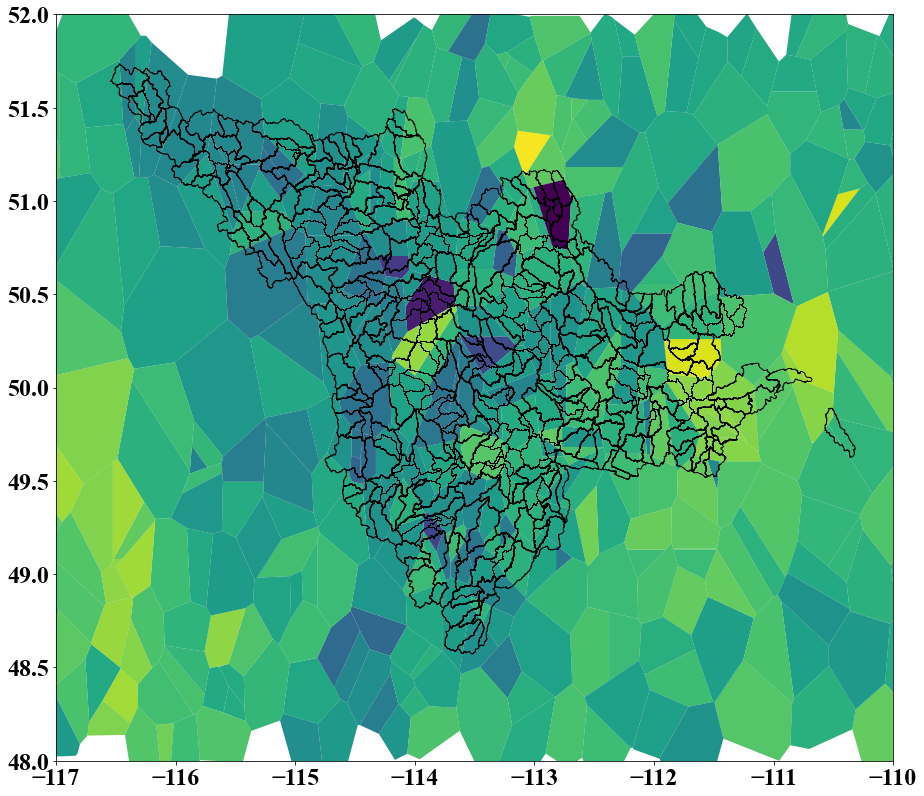

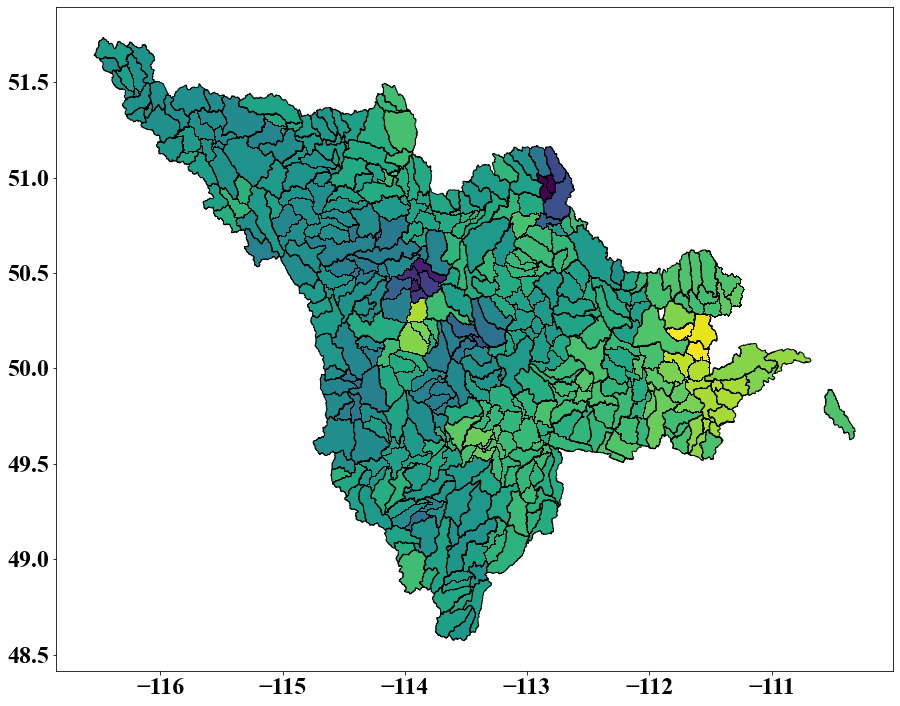

In [20]:
nc_name = sorted(glob.glob(cndx.name_of_nc_files))
ds = xr.open_dataset(nc_name[0])


df = pd.DataFrame()

temp = np.array (ds.tmin [:,300])
temp = temp[~np.isnan(temp)]

newdata = gpd.read_file('Thissen.shp')

idx = np.array(newdata.ID).astype(int)

newdata['values'] = temp[idx]


newdata['LONGITUDE'] = newdata['LONGITUDE'].astype(float)
newdata['LATITUDE'] = newdata['LATITUDE'].astype(float)

newdata_slice = newdata

newdata_slice = newdata [newdata['LONGITUDE']>-120]
newdata_slice = newdata_slice [newdata_slice['LONGITUDE']<-108]
newdata_slice = newdata_slice [newdata_slice['LATITUDE']>48]
newdata_slice = newdata_slice [newdata_slice['LATITUDE']<52]

ax  = newdata_slice.plot(column="values", edgecolor='k',linewidth = 0.01 , figsize=(15,30))

shp_target = gpd.read_file(cndx.temporary_candex_folder+ cndx.name_of_case + '_target_shapefile.shp') # load the target shapefile

shp_target.geometry.boundary.plot(color=None, edgecolor='k',linewidth = 1 , figsize=(15,30),ax=ax)

plt.xlim([-117, -110])
plt.ylim([  48,   52])

plt.savefig('case3A.png')

#ctx.add_basemap(ax, zoom=2, crs='EPSG:4326')
#plt.scatter (points['LONGITUDE'],points['LATITUDE'])



nc_names = sorted(glob.glob (cndx.name_of_nc_output_folder + cndx.name_of_case + '*.nc'))
ds       = xr.open_dataset(nc_names[0]) # the first netcdf file

print(ds)

temp = np.array (ds.tmin [:,300])

shp = gpd.read_file('Thissen.shp')



values   = ds.tmin [300,:] # the first time frame of the first 
IDs      = ds.ID [:] # get the ID
# create a data frame for the model simulation
df = pd.DataFrame()
df ['value'] = values
df ['ID_t']    = IDs  # .astype(int)
df = df.sort_values (by = 'ID_t')
# load the shape file target that is generated by candex (with consistent IDs)
shp_target = gpd.read_file(cndx.temporary_candex_folder+ cndx.name_of_case + '_target_shapefile.shp') # load the target shapefile
shp_target ['ID_t'] = shp_target ['ID_t'].astype(float)
shp_target = shp_target.sort_values(by='ID_t')# sort on values
shp_target = pd.merge_asof(shp_target, df, on='ID_t', direction='nearest')
shp_target = shp_target.set_geometry('geometry') #bring back the geometry filed; pd to gpd

# plotting
f, axes = plt.subplots(1,1,figsize=(15,15))
shp_target.plot(column= 'value', edgecolor='k',linewidth = 1, ax = axes )#, legend=True)

plt.savefig('case3B.png')
